In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.shape

(1338, 7)

In [3]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [4]:
# Checking for null values

data.isna().any().any()

np.False_

In [5]:
# Checking for duplicates

data.duplicated().sum()

np.int64(1)

In [6]:
# Dropping the duplicate

data = data.drop_duplicates()

In [7]:
data.shape

(1337, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
# Getting the column names for numerical and categorical data

num_var = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_var = data.select_dtypes(include='object').columns.tolist()

cat_var

['sex', 'smoker', 'region']

In [10]:
num_var

['age', 'bmi', 'children', 'charges']

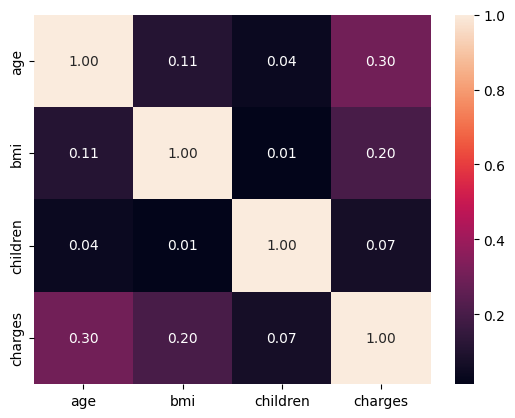

In [11]:
# Heatmap of numerical variables

sns.heatmap(data[num_var].corr(), annot=True, fmt=".2f")

plt.show()

Very little correlation between charges and the other numerical variables. Age and bmi are the highest, but still not very high.

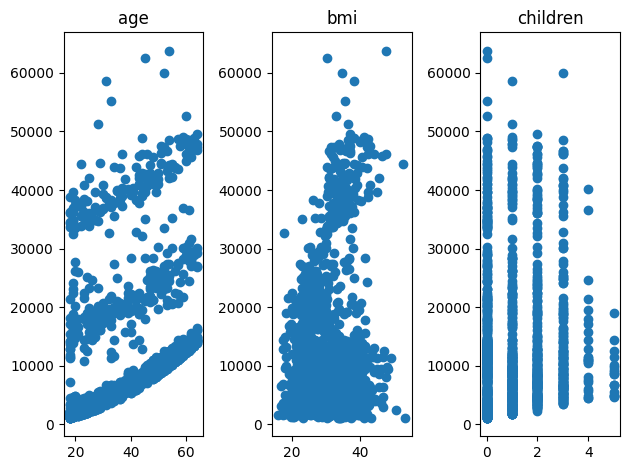

In [12]:
# Scatterplots of numerical variables against charges

plt.subplot(1,3,1)
plt.scatter(data['age'], data['charges'])
plt.title('age')

plt.subplot(1,3,2)
plt.scatter(data['bmi'], data['charges'])
plt.title('bmi')

plt.subplot(1,3,3)
plt.scatter(data['children'], data['charges'])
plt.title('children')

plt.tight_layout()
plt.show()

Positive correlation with age, but there are three apparent linear relationships to investigate.

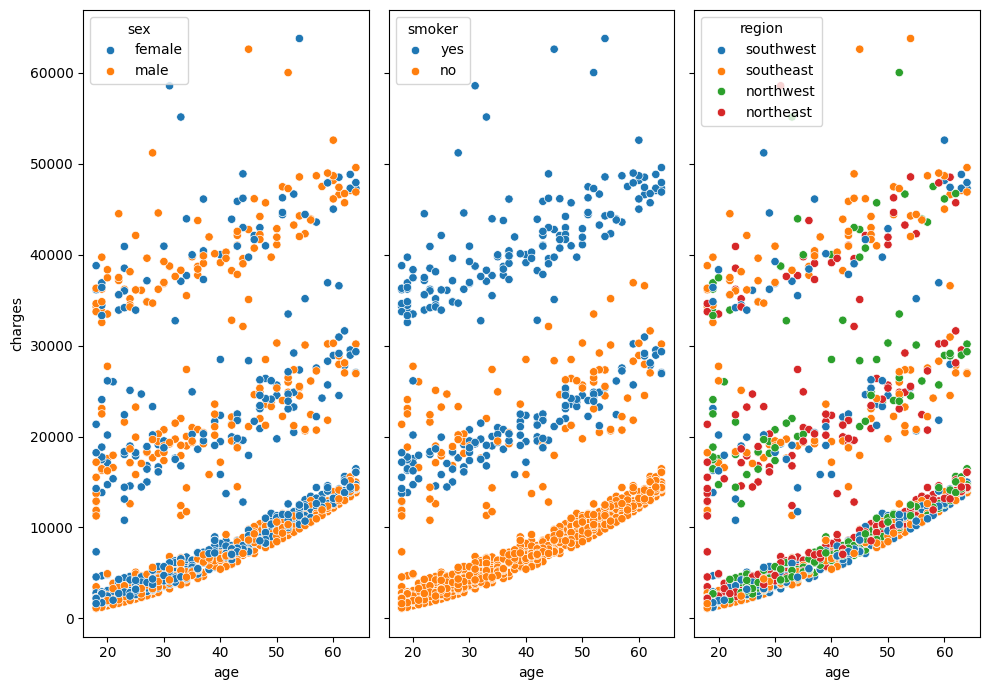

In [13]:
fig, axes = plt.subplots(1,3, figsize=(10,7), sharey=True)

for ax, hue_var in zip(axes, cat_var):
    sns.scatterplot(data=data, x='age', y='charges', hue=hue_var, ax=ax, palette='tab10')

plt.tight_layout()
plt.show()

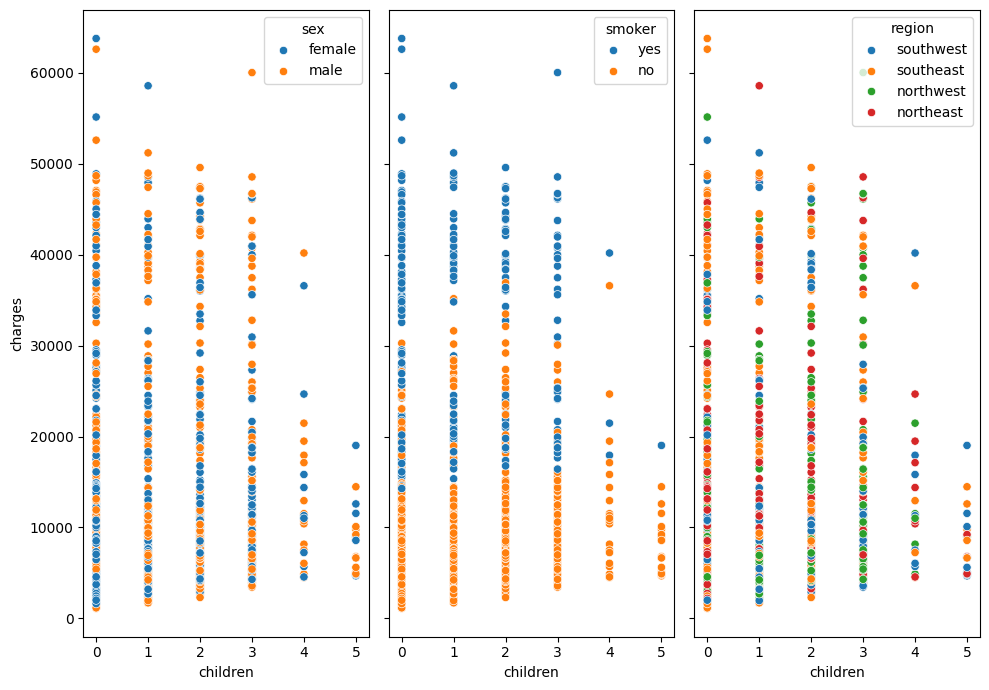

In [14]:
fig, axes = plt.subplots(1,3, figsize=(10,7), sharey=True)

for ax, hue_var in zip(axes, cat_var):
    sns.scatterplot(data=data, x='children', y='charges', hue=hue_var, ax=ax, palette='tab10')

plt.tight_layout()
plt.show()

There seems to be a dropoff in charges with 4-5 children.

In [15]:
data.children.value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [16]:
# Analysis of categorical variables: 'sex', 'smoker', 'region'

data.groupby('sex')['charges'].mean()


sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [17]:
# Analysis of smoker and charges

data.groupby('smoker')['charges'].mean()


smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

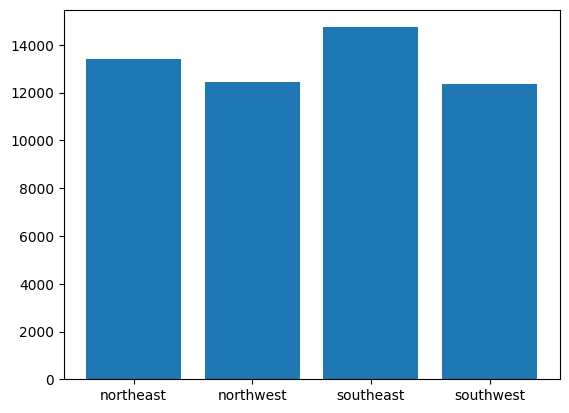

In [18]:
# Analysis of region and charges

mean_by_region = data.groupby('region')['charges'].mean().reset_index()

plt.bar(mean_by_region['region'], mean_by_region['charges'])

plt.show()

In [19]:
# Since smoking is such a significant feature, examining non-smokers for correlation

non_smoker = data[data['smoker'] == 'no']


In [20]:
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


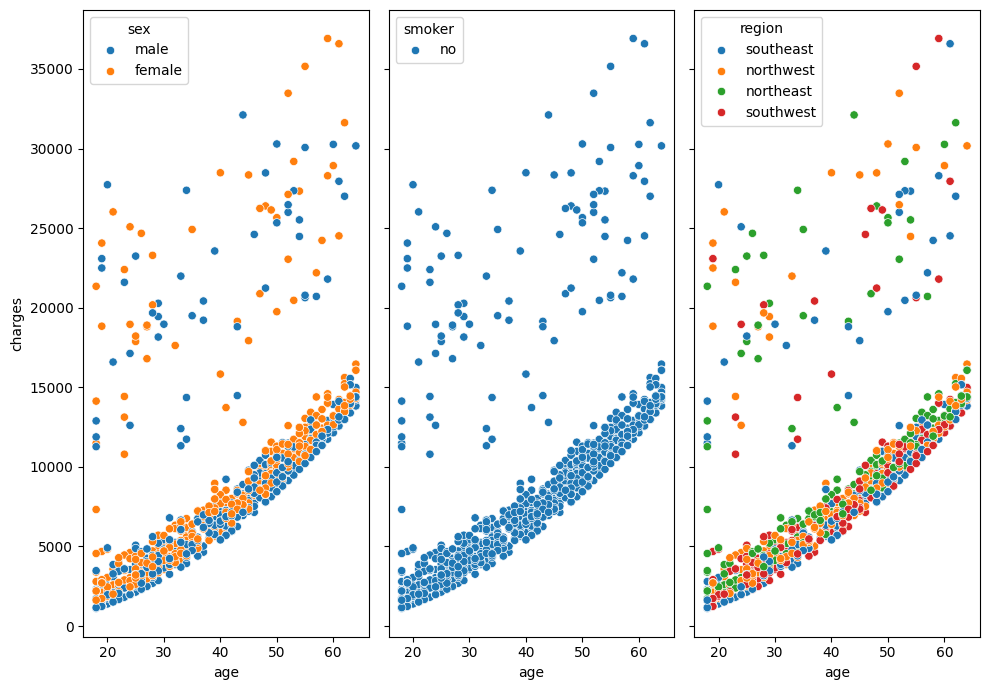

In [21]:
fig, axes = plt.subplots(1,3, figsize=(10,7), sharey=True)

for ax, hue_var in zip(axes, cat_var):
    sns.scatterplot(data=non_smoker, x='age', y='charges', hue=hue_var, ax=ax, palette='tab10')

plt.tight_layout()
plt.show()

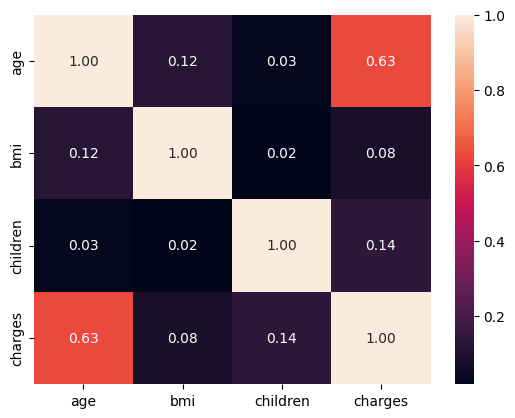

In [22]:
# Heatmap of numerical variables among non-smokers

sns.heatmap(non_smoker[['age', 'bmi', 'children', 'charges']].corr(), annot=True, fmt=".2f")

plt.show()

Age is the biggest factor among non-smokers.

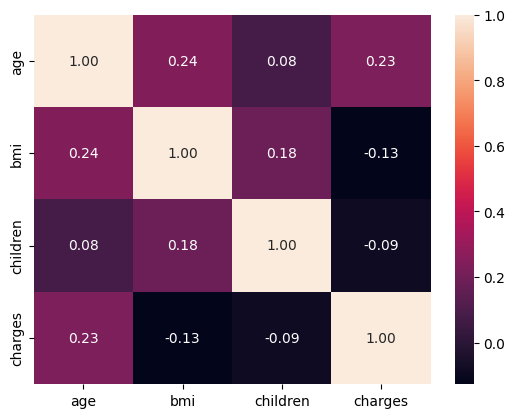

In [23]:
# Filtering out people with charges under 15000

non_smoker_over_15k = non_smoker[non_smoker['charges'] > 15000]

# Heatmap of numerical variables among non-smokers paying over 15000

sns.heatmap(non_smoker_over_15k[['age', 'bmi', 'children', 'charges']].corr(), annot=True, fmt=".2f")

plt.show()

In [24]:
# Getting dummy variables for categorical data

cat_data = pd.get_dummies(data[cat_var])

cat_data.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False


In [25]:
# Resetting cat_var to match dummy variables

cat_var = cat_data.columns.tolist()

cat_var

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [26]:
# Recreating the dataframe with the numerical and dummy columns 

data = pd.concat([data[num_var], cat_data], axis=1)

In [27]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [28]:
# Creating lists for features and target

num_var.remove('charges') # Removing target from num_var

features = num_var + cat_var

target = 'charges'

In [29]:
# Splitting the dataset

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [30]:
# Separating the numerical parts of X for scaling

X_train_num = X_train[num_var]
X_test_num = X_test[num_var]

In [31]:
# Scaling the numerical data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_num.index, columns=X_train_num.columns)

X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test_num.index, columns=X_test_num.columns)


In [32]:
# Reassembling the fully processed X sets

X_train_p = pd.concat([X_train_scaled, X_train[cat_var]], axis=1)
X_test_p = pd.concat([X_test_scaled, X_test[cat_var]], axis=1)

In [33]:
X_train_p.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1114,-1.157680,-0.996928,-0.907908,False,True,True,False,True,False,False,False
968,-1.300619,-0.792762,0.766904,False,True,True,False,True,False,False,False
599,0.914926,1.154664,0.766904,True,False,True,False,False,True,False,False
170,1.701087,1.806837,-0.907908,False,True,True,False,False,False,True,False
275,0.557580,-0.651417,0.766904,True,False,True,False,True,False,False,False


In [34]:
# Initializing and training model

model = LinearRegression()
model.fit(X_train_p, y_train)

LinearRegression()

In [35]:
# Printing intercept and coefficient

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 19963.60825899218
Coefficients (b1, b2): [  3472.97555343   1927.82825101    636.5011853      50.771027
    -50.771027   -11538.88229643  11538.88229643    472.45520552
     80.69375073   -366.46441021   -186.68454604]


In [36]:
# Model prediction

y_pred = model.predict(X_test_p)
y_pred

array([ 8.14369388e+03,  5.73711568e+03,  1.43693149e+04,  3.17455136e+04,
        8.96238666e+03,  1.31497224e+04,  3.04467607e+04,  1.45328881e+03,
        1.06330184e+04,  1.13189438e+04,  1.03778536e+04,  3.31184377e+04,
        3.10772527e+04,  1.74119253e+04,  1.08016743e+04,  9.52889964e+03,
        4.16103784e+03,  3.17315373e+04,  3.21938875e+03,  5.22992460e+03,
        3.54979004e+03,  3.02837740e+04,  1.48989509e+04,  3.04569093e+04,
        3.11077668e+04,  5.51196081e+03,  3.55030401e+04,  3.65704810e+04,
        1.14123133e+04,  1.42056990e+04,  6.50234029e+03,  1.27246945e+04,
        3.99806590e+02,  1.20883980e+04,  3.96592069e+04,  1.23395540e+04,
        4.74412279e+03,  3.91903157e+03,  3.08606789e+04,  8.95870663e+03,
        7.05389441e+03,  3.01125636e+04,  3.47804324e+04,  1.22916189e+04,
        7.35739310e+03,  3.42060530e+03,  6.21243471e+03,  8.98345200e+03,
        4.26401828e+03,  9.01992870e+03,  6.60149578e+03,  1.20802337e+04,
        3.12447687e+04,  

In [37]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 35478020.6752356
Coefficient of determination: 0.8069287081198012
